In [16]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time

In [17]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,23):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

show_data()

In [326]:
data = pd.read_csv(r'train/7554/SimpleTest/8.csv')

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1185 non-null   object 
 1    Y         1183 non-null   float64
 2    Pressure  1183 non-null   float64
 3    TiltX     1183 non-null   float64
 4    TiltY     1183 non-null   float64
 5    Time      1183 non-null   object 
dtypes: float64(4), object(2)
memory usage: 55.7+ KB


In [328]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,910.472802864072,888.302113,0.094224,-3875.0,-351.0,00:05.8895936
1,910.472802864072,888.302113,0.099107,-3875.0,-351.0,00:05.9052263
2,910.472802864072,888.302113,0.123278,-3875.0,-351.0,00:05.9208500


In [329]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

print(start_time)
print(submit_time)

Time Elapsed till drawing started: 00:05.8895936
Time Elapsed till drawing submit: 00:26.1312267


In [330]:
total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Total time drawing: 00:20.241633099999998


In [331]:
data['X'] = data.X.astype(float)

In [332]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [333]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,910.472803,888.302113,0.094224,-3875.0,-351.0,5.889594
1,910.472803,888.302113,0.099107,-3875.0,-351.0,5.905226
2,910.472803,888.302113,0.123278,-3875.0,-351.0,5.920850


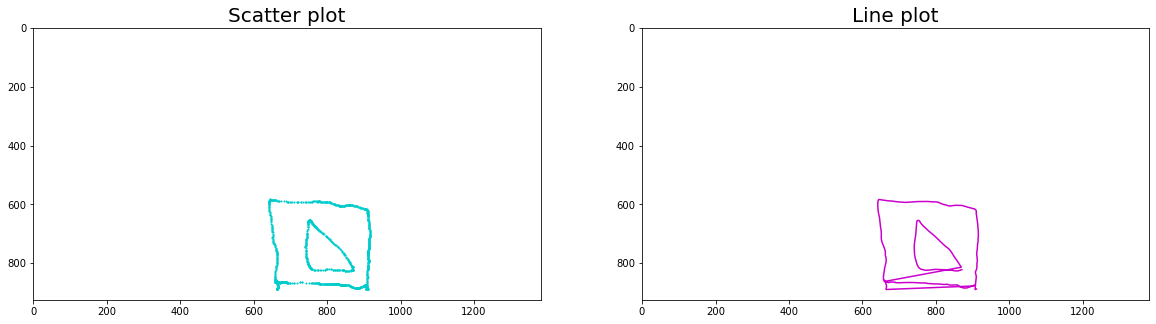

In [334]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

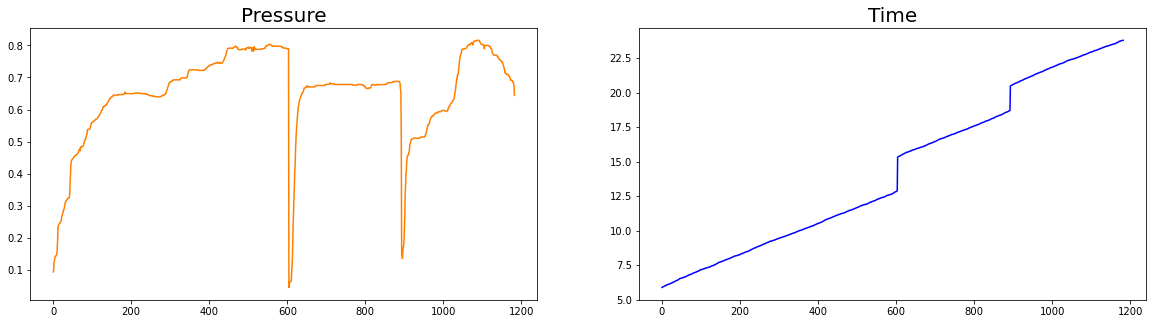

In [335]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [336]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=20).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 2


## *Number of lines:*

In [337]:
distance = []
for x in range(len(data.X)-1):
        distance.append(math.sqrt((data.X[x+1] - data.X[x])**2 + (data.Y[x+1] - data.Y[x])**2))       

In [338]:
distance =pd.Series(distance)

In [339]:
print('max distance:',max(distance),'\nmin distance:',min(distance),'\nmean distance:',distance.mean())

max distance: 238.59507412888317 
min distance: 0.0 
mean distance: 1.7454048925748697


## *Open or closed shape:*

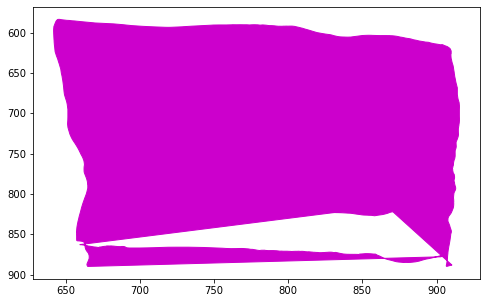

In [340]:
fig=plt.figure(figsize=(8,5))

#ax= fig.add_subplot(1, 1, 1)
plt.gca().invert_yaxis()
fill = plt.fill(data.X,data.Y, color= "#CC00CC")
fill = plt.gca()
y_fill_bound = fill.get_ybound()
x_fill_bound = fill.get_xbound()

In [342]:
if((data.X.max() < x_fill_bound[1]) or (data.X.min() > x_fill_bound[0]) or
   (data.Y.max() < y_fill_bound[1]) or (data.Y.min() > y_fill_bound[0])):
    print("SHAPE ISN'T CLOSE")
else: print("SHAPE IS CLOSE")

SHAPE ISN'T CLOSE


<IPython.core.display.Javascript object>


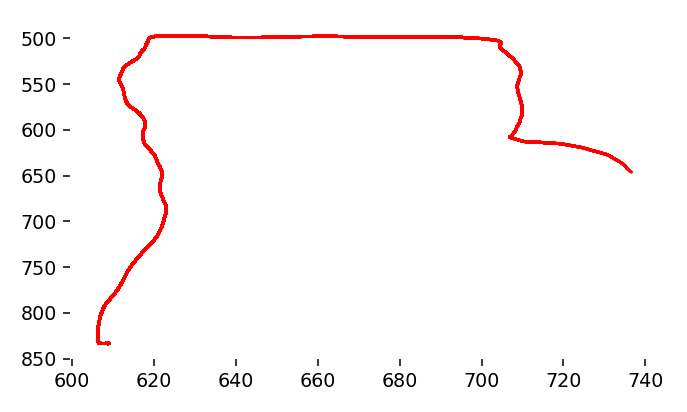

In [62]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [63]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


KeyboardInterrupt: 

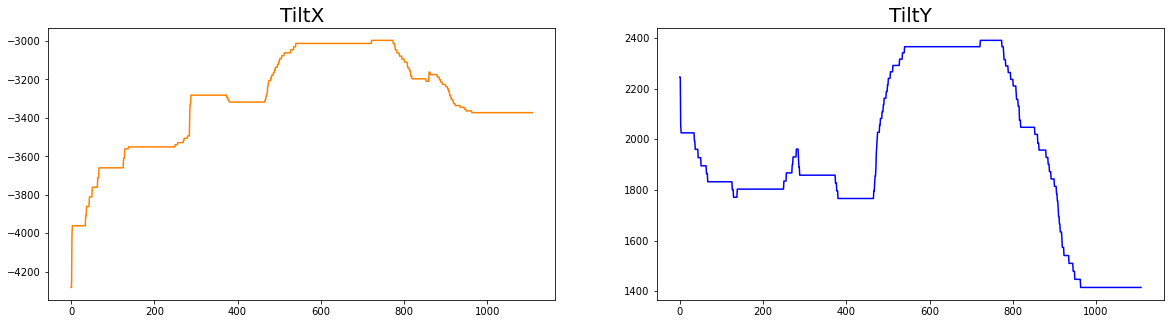

In [40]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.TiltX,"#FF8000")
ax.set_title("TiltX",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.TiltY,c='b')
ax2.set_title("TiltY",fontdict={'fontsize': 20})

plt.show()